# Length

In [446]:
import os
import pandas
import numpy as np
import pandas as pd
import re
import ast
import json
from CS_feature_extractor import *
DATA_DIR = '../data'

# Experiment Config
DF_NAME = 'MathQA'

NUM_OF_SAMPLES = 500
NUM_OF_COT = 40
MODEL = 'gpt-3.5-turbo-0125'
storage_dir = os.path.join(DATA_DIR, f'Evaluation_CoTs/Algo_Design_Data')
hard_file_path = os.path.join(storage_dir, f'{DF_NAME}_hard.json')
easy_file_path = os.path.join(storage_dir, f'{DF_NAME}_easy.json')

In [447]:
def sigmoid(x):
    return 1 / (1 + np.exp(-(x-5)))

In [448]:
with open(hard_file_path,'r') as f:
    data = json.load(f)
hard = pd.DataFrame(data)
hard['size_of_cot'] = [[(i+1)^2 for i in range(40)] for j in range(500)]
for row_idx in range(len(hard)):
    hard['SIM_COT_AGG'][row_idx][0] = 0.5
# hard['SIM_COT_AGG'] = hard['SIM_COT_AGG'].apply(lambda lst: [x*sigmoid(idx) for idx,x in enumerate(lst)])
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,size_of_cot
0,0,c,"[54, c, 111, c, 111, a, b, a, d, 11, c, 112, 1...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[12, 6, 4, 5, 6, 3, 0, 4, 6, 12, 6, 4, 6, 3, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5518672199170125, 0.6051282051282052, ...","[0.5, 0.5495867768595042, 0.5443548387096775, ...","[0.0, 0.5518672199170125, 0.5955873583780561, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
1,1,c,"[a, a, a, a, a, c, a, a, a, a, a, a, a, a, a, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 5, 5, 5, 3, 5, 5, 6, 3, 4, 3, 8, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5, 0, 0, 0, 5, 2, 0, 2, 0, 5, 9, 0, ...",Challenging Math,"[0.0, 0.6423357664233577, 0.5263157894736843, ...","[0.5, 0.6423357664233577, 0.5428571428571429, ...","[0.0, 0.6423357664233577, 0.5515014530190507, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
2,2,a,"[a, a, a, a, a, error, error, a, a, a, error, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 2, 2, 2, 10, 10, 2, 2, 0, 10, 0, 0, 9, ...",Challenging Math,"[0.0, 0.943089430894309, 0.943089430894309, 0....","[0.5, 0.943089430894309, 0.967479674796748, 0....","[0.0, 0.943089430894309, 0.9715447154471545, 0...","[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
3,3,a,"[error, a, a, a, a, a, a, a, a, a, 100%, 100%,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 6, 5, 6, 5, 4, 3, 4, 4, 4, 7, 6, 3, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 2, 9, 2, 9, 9, 2, 0, 9, 2, 2, 0, 0, 5, 0,...",Challenging Math,"[0.0, 0.012422360248447228, 0.5151515151515151...","[0.5, 0.012345679012345734, 0.5276381909547738...","[0.0, 0.012422360248447228, 0.2717601547388781...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
4,4,b,"[b, 36, b, b, b, b, e, b, b, b, e, b, b, b, b,...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 6, 3, 3, 3, 3, 4, 3, 3, 3, 5, 5, 3, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5091575091575091, 0.49416342412451364,...","[0.5, 0.5072992700729927, 0.5226480836236933, ...","[0.0, 0.5091575091575091, 0.5772703913075399, ...","[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,d,"[d, d, d, d, d, d, d, d, d, d, d, d, d, d, d, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 6, 1, 6, 7, 6, 5, 6, 6, 5, 6, 6, 7, 4, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8583690987124464, 0.31759656652360513,...","[0.5, 0.8583690987124464, 0.3157894736842105, ...","[0.0, 0.8583690987124464, 0.32119144565496494,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",

In [449]:
with open(easy_file_path,'r') as f:
    data = json.load(f)
easy = pd.DataFrame(data)
easy['size_of_cot'] = [[i+1 for i in range(40)] for j in range(500)]
for row_idx in range(len(easy)):
    easy['SIM_COT_AGG'][row_idx][0] = 0.5
easy['SIM_COT_AGG'] = easy['SIM_COT_AGG'].apply(lambda lst: [x*sigmoid(idx) for idx,x in enumerate(lst)])
easy

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,size_of_cot
0,0,c,"[c, c, c, c, c, c, c, c, c, c, c, c, c, c, c, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.9591836734693877, 0.9333333333333333, ...","[0.0033464254621424277, 0.017135510842262905, ...","[0.0, 0.9591836734693877, 0.9529680365296804, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,1,b,"[e, e, c, a, e, 9-May, c, d, c, c, e, 9-May, c...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 4, 3, 4, 3, 3, 3, 6, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.8916666666666666, 0.9285714285714286, ...","[0.0033464254621424277, 0.016037703882864972, ...","[0.0, 0.8916666666666666, 0.8857733175914995, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,2,c,"[c, a, c, c, c, d, c, c, c, c, c, c, 7, c, c, ...","[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[6, 6, 9, 6, 6, 4, 5, 6, 6, 7, 6, 6, 6, 6, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.8622754491017964, 0.6601941747572815, ...","[0.0033464254621424277, 0.01541675139607848, 0...","[0.0, 0.8622754491017964, 0.6989089685667595, ...","[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,3,d,"[d, d, a, 18-Jan, b, b, b, b, b, d, b, 18-Jan,...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[4, 3, 4, 3, 6, 6, 3, 5, 5, 3, 3, 3, 7, 7, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.6637554585152838, 0.7188940092165899, ...","[0.0033464254621424277, 0.01193844504034025, 0...","[0.0, 0.6637554585152838, 0.6420557002604689, ...","[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,4,a,"[a, b, a, d, b, a, b, cannot be determined, b,...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[4, 6, 5, 3, 8, 3, 6, 3, 3, 3, 2, 3, 4, 6, 6, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.5139442231075697, 0.5780590717299579, ...","[0.0033464254621424277, 0.009315566912637062, ...","[0.0, 0.5139442231075697, 0.6768800031546985, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,b,"[b, b, b, b, b, b, b, b, 17, b, 17, 17, b, b, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[4, 6, 5, 6, 9, 5, 6, 4, 8, 4, 8, 8, 8, 8, 8, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.6560509554140128, 0.7225806451612904, ...","[0.0033464254621424277, 0.011799870229907203, ...","[0.0, 0.6560509554140128, 0.7371292487551419, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[1, 2, 3, 4, 5, 6, 

In [450]:
hard = pd.concat([hard,easy])
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,size_of_cot
0,0,c,"[54, c, 111, c, 111, a, b, a, d, 11, c, 112, 1...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[12, 6, 4, 5, 6, 3, 0, 4, 6, 12, 6, 4, 6, 3, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5518672199170125, 0.6051282051282052, ...","[0.5, 0.5495867768595042, 0.5443548387096775, ...","[0.0, 0.5518672199170125, 0.5955873583780561, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
1,1,c,"[a, a, a, a, a, c, a, a, a, a, a, a, a, a, a, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 5, 5, 5, 3, 5, 5, 6, 3, 4, 3, 8, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5, 0, 0, 0, 5, 2, 0, 2, 0, 5, 9, 0, ...",Challenging Math,"[0.0, 0.6423357664233577, 0.5263157894736843, ...","[0.5, 0.6423357664233577, 0.5428571428571429, ...","[0.0, 0.6423357664233577, 0.5515014530190507, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
2,2,a,"[a, a, a, a, a, error, error, a, a, a, error, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 2, 2, 2, 10, 10, 2, 2, 0, 10, 0, 0, 9, ...",Challenging Math,"[0.0, 0.943089430894309, 0.943089430894309, 0....","[0.5, 0.943089430894309, 0.967479674796748, 0....","[0.0, 0.943089430894309, 0.9715447154471545, 0...","[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
3,3,a,"[error, a, a, a, a, a, a, a, a, a, 100%, 100%,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 6, 5, 6, 5, 4, 3, 4, 4, 4, 7, 6, 3, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 2, 9, 2, 9, 9, 2, 0, 9, 2, 2, 0, 0, 5, 0,...",Challenging Math,"[0.0, 0.012422360248447228, 0.5151515151515151...","[0.5, 0.012345679012345734, 0.5276381909547738...","[0.0, 0.012422360248447228, 0.2717601547388781...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
4,4,b,"[b, 36, b, b, b, b, e, b, b, b, e, b, b, b, b,...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 6, 3, 3, 3, 3, 4, 3, 3, 3, 5, 5, 3, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5091575091575091, 0.49416342412451364,...","[0.5, 0.5072992700729927, 0.5226480836236933, ...","[0.0, 0.5091575091575091, 0.5772703913075399, ...","[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,b,"[b, b, b, b, b, b, b, b, 17, b, 17, 17, b, b, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[4, 6, 5, 6, 9, 5, 6, 4, 8, 4, 8, 8, 8, 8, 8, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.6560509554140128, 0.7225806451612904, ...","[0.0033464254621424277, 0.011799870229907203, ...","[0.0, 0.6560509554140128, 0.7371292487551419, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 1, 1

# Early stopping and SC 

In [451]:
from collections import Counter

def calculate_correctness(df):
    # Define a helper function to determine the majority and compare it with the correct answer
    def check_majority(answers, correct):
        if not answers:
            return 0
        # Count the occurrences of each answer and find the most common one
        most_common = Counter(answers).most_common(1)[0][0]
        # Compare the most common answer with the correct answer
        return 1 if most_common == str(correct) else 0

    # Apply the helper function across the DataFrame rows
    df['SC_correctness'] = df.apply(lambda row: check_majority(row['CoT answers'], row['correct answer']), axis=1)
    return df

hard = calculate_correctness(hard)

In [452]:
hard.SC_correctness.value_counts()

SC_correctness
1    570
0    430
Name: count, dtype: int64

In [453]:
easy = calculate_correctness(easy)
easy.SC_correctness.value_counts()

SC_correctness
1    292
0    208
Name: count, dtype: int64

In [454]:
import pandas as pd

def evaluate_answers_with_window(df, window_size):
    # Helper function to evaluate answers with a sliding window
    def evaluate_window(answers, correct):
        # Track the number of steps (checks) taken
        steps = window_size-1
        
        # If the list is shorter than the window size, adjust the window size to the length of the list
        window_size_adjusted = min(window_size, len(answers))
        
        # Slide through the list with the adjusted window size
        for i in range(len(answers) - window_size_adjusted + 1):
            # Check the window content
            window = answers[i:i + window_size_adjusted]
            steps += 1
            
            # If all elements in the window are the same, evaluate correctness
            if window.count(window[0]) == window_size_adjusted:
                return 1 if window[0] == str(correct) else 0, steps
        
        # If no unanimous window is found, use the same value as SC_correctness and set steps to the length of the list
        majority = Counter(answers).most_common(1)[0][0]
        correctness = 1 if majority == str(correct) else 0
        return correctness, len(answers)

    # Apply the function to each row in the DataFrame
    result = df.apply(lambda row: evaluate_window(row['CoT answers'], row['correct answer']), axis=1)
    df['ES_correctness'] = result.apply(lambda x: x[0])
    df['ES_steps'] = result.apply(lambda x: x[1])

    return df

easy = evaluate_answers_with_window(easy,5)

In [455]:
easy.ES_correctness.value_counts()

ES_correctness
1    297
0    203
Name: count, dtype: int64

In [456]:
easy.ES_steps.mean()

18.648

In [457]:

hard = evaluate_answers_with_window(hard,5)
hard.ES_correctness.value_counts()

ES_correctness
1    573
0    427
Name: count, dtype: int64

In [458]:
hard.ES_steps.mean()

19.301

In [543]:
feature_li = [
 # 'LEN',
 'QUA_IM',
 'DIF_IV',
 # 'DIF_SUB',
 # 'SIM_COT_BIGRAM',
 'SIM_COT_AGG',
 # 'SIM_COT_PW',
 'SIM_AC_BIGRAM',
 'SIM_AC_AGG',
 'SIM_AC_PW',
    'size_of_cot'

 
  ]

# Visualize

In [544]:
import pandas as pd

def concatenate_columns(df,data_columns, outcome_column):
    # Initialize an empty dictionary to store the concatenated data
    concatenated_data = {}
    
    # Get the number of rows based on the length of the outcome column
    num_rows = len(df)
    
    # Iterate over each column
    for column in data_columns+[outcome_column]:
        # Initialize an empty list to store the concatenated values for the current column
        concatenated_values = []
        
        # Iterate over each row
        for i in range(num_rows):
            # Get the list of values for the current column and row
            
            values = df[column].iloc[i]
            
            # Concatenate the values into a single string
            concatenated_values += list(values)
            
        
        # Add the concatenated values to the dictionary with the column name as the key
        concatenated_data[column] = concatenated_values
        print(len(concatenated_values))
    # Add the outcome column to the concatenated data dictionary
    
    # Create a DataFrame from the concatenated data dictionary
    hard_final = pd.DataFrame(concatenated_data)
    
    return hard_final

hard_final = concatenate_columns(hard,feature_li,'Correctness')
easy_final = concatenate_columns(easy,feature_li,'Correctness')

40000
40000
40000
40000
40000
40000
40000
40000
20000
20000
20000
20000
20000
20000
20000
20000


In [545]:
hard_final['cot_answer'] = np.repeat(hard['correct answer'].values,40)

In [546]:
easy_final['cot_answer'] = np.repeat(easy['correct answer'].values,40)

In [547]:
from collections import Counter
print('--------------EASY--------------')
for col in easy_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(easy_final[col]))
print('--------------HARD--------------')
for col in hard_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(hard_final[col]))

--------------EASY--------------
QUA_IM : Counter({0: 19952, 1: 48})
DIF_IV : Counter({0: 18771, 2: 870, 5: 199, 9: 81, 10: 78, 1: 1})
SIM_AC_BIGRAM : Counter({1: 11231, 0: 8769})
SIM_AC_AGG : Counter({1: 12909, 0: 7091})
SIM_AC_PW : Counter({1: 10795, 0: 9205})
size_of_cot : Counter({1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500})
Correctness : Counter({1: 10142, 0: 9858})
cot_answer : Counter({'c': 5400, 'b': 4080, 'a': 3800, 'd': 3600, 'e': 3120})
--------------HARD--------------
QUA_IM : Counter({0: 39888, 1: 112})
DIF_IV : Counter({0: 34722, 2: 2939, 10: 1024, 5: 851, 9: 452, 1: 6, 11: 2, 3: 2, 6: 2})
SIM_AC_BIGRAM : Counter({1: 21811, 0: 18189})
SIM_AC_AGG : Counter({1: 25315, 0: 1

# Hard DF

Optimization terminated successfully.
         Current function value: 0.589897
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                32000
Model:                          Logit   Df Residuals:                    31992
Method:                           MLE   Df Model:                            7
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.1483
Time:                        14:22:34   Log-Likelihood:                -18877.
converged:                       True   LL-Null:                       -22163.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4659      0.047    -30.974      0.000      -1.559      -1.373
QUA_IM           -2.

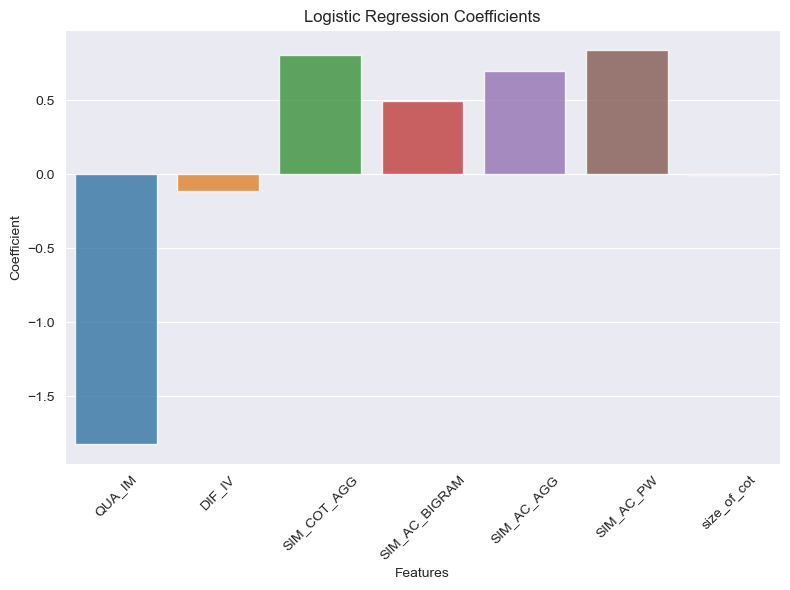

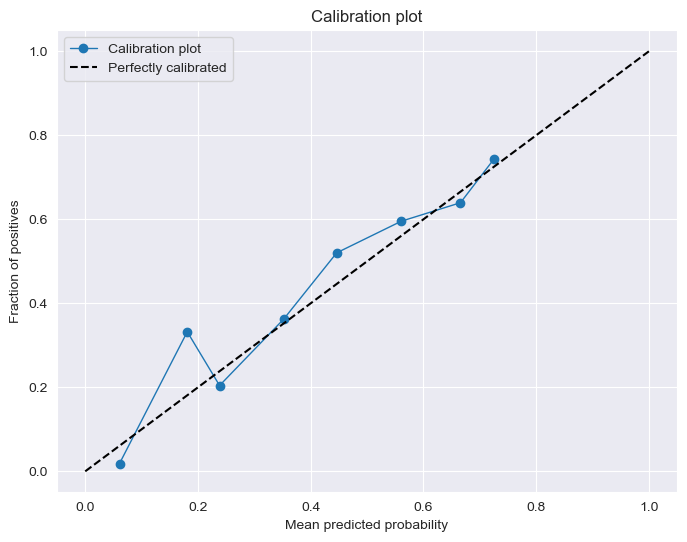

In [548]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc,roc_curve, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Calculate the split index
split_idx = int(len(hard_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train_hard = hard_final[feature_li].iloc[:split_idx]
y_train_hard = hard_final['Correctness'].iloc[:split_idx]
X_test_hard = hard_final[feature_li].iloc[split_idx:]
y_test_hard = hard_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train_hard = sm.add_constant(X_train_hard)
X_test_hard = sm.add_constant(X_test_hard)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train_hard, X_train_hard)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train_hard = hard_final[feature_li].iloc[:split_idx]
y_train_hard  = hard_final['Correctness'].iloc[:split_idx]
X_test_hard  = hard_final[feature_li].iloc[split_idx:]
y_test_hard  = hard_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_hard , y_train_hard )

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test_hard)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test_hard, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train_hard.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_hard, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()
lr_hard_model = model

In [529]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc,roc_curve, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# Calculate the split index
split_idx = int(len(hard_final) * 0.8)  # 80% of the length of the dataset


# Split the data into training and test sets
X_train_hard = hard_final[feature_li].iloc[:split_idx]
y_train_hard  = hard_final['Correctness'].iloc[:split_idx]
X_test_hard  = hard_final[feature_li].iloc[split_idx:]
y_test_hard  = hard_final['Correctness'].iloc[split_idx:]
model = MLPClassifier(solver='adam', alpha=1e-3,
               hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)

model.fit(X_train_hard , y_train_hard )

# Print the model coefficients and intercept

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test_hard)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test_hard, y_pred_proba)
print(f"The AUROC score is: {auroc}")
hard_nn = model

The AUROC score is: 0.708912605480261


The AUROC score is: 0.6511904366063411
The Brier score is: 0.2892477742615493
Log Loss is: 2.4364745021590153


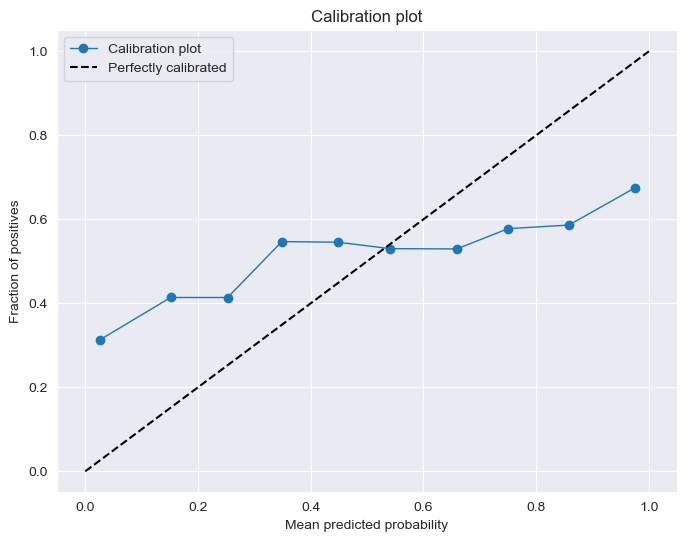

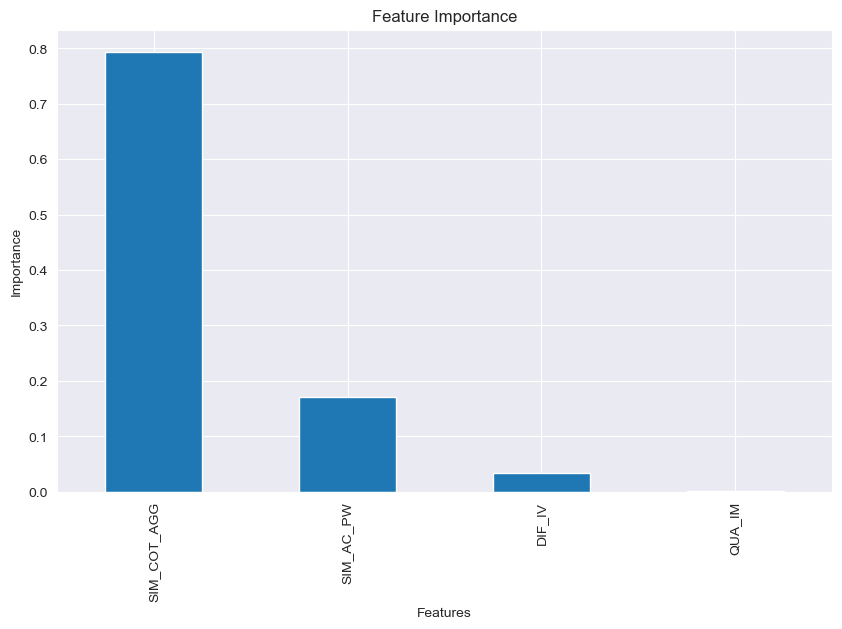

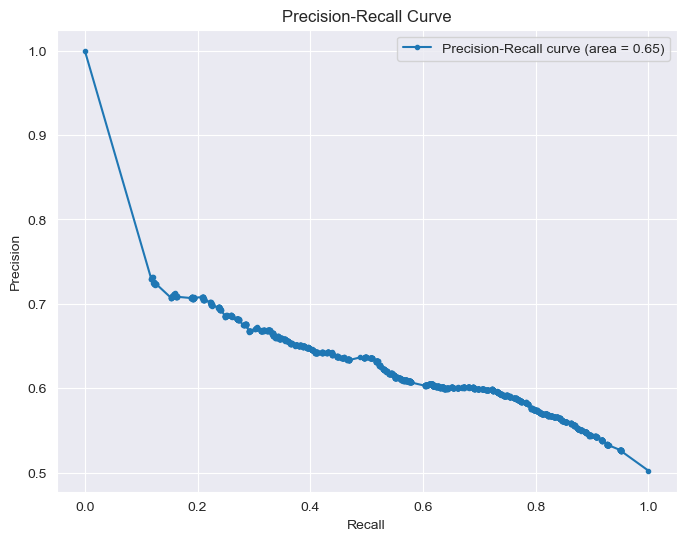

In [530]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_hard, y_train_hard)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test_hard)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test_hard, y_pred_proba)
brier = brier_score_loss(y_test_hard, y_pred_proba)
logloss = log_loss(y_test_hard, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_hard, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train_hard.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test_hard, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
rf_hard_model = model

W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore

AUROC Score: 0.7378263159828987
Best Threshold: 0.3696317564138731
Confusion Matrix:
[[2230 1752]
 [ 725 3293]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64      3982
           1       0.65      0.82      0.73      4018

    accuracy                           0.69      8000
   macro avg       0.70      0.69      0.68      8000
weighted avg       0.70      0.69      0.68      8000


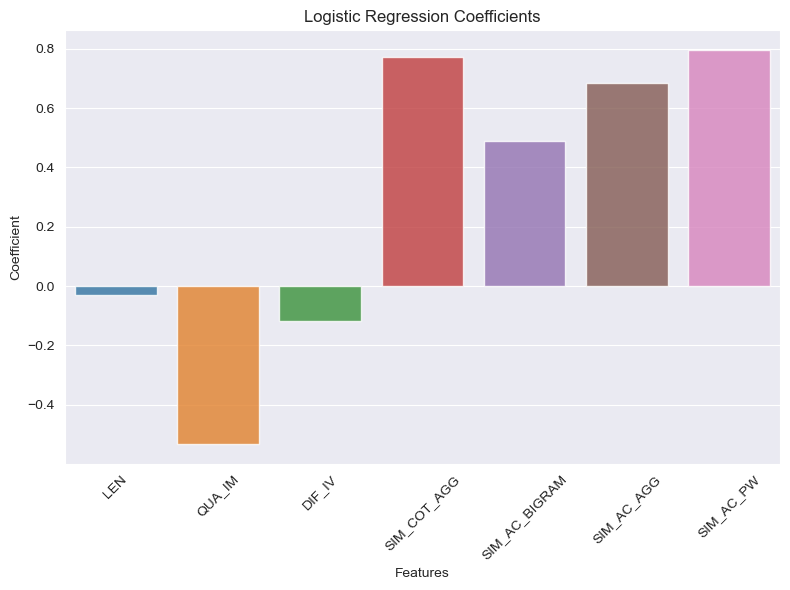

In [170]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train_hard, y_train_hard)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test_hard)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_hard, y_probs)
auc_score = roc_auc_score(y_test_hard, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test_hard, y_probs > thresh) for thresh in thresholds]
lr_hard_best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {lr_hard_best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= lr_hard_best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test_hard, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_hard, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=feature_li)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
lr_hard_model = model

# Easy

Optimization terminated successfully.
         Current function value: 0.404258
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15993
Method:                           MLE   Df Model:                            6
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.3128
Time:                        16:38:36   Log-Likelihood:                -6468.1
converged:                       True   LL-Null:                       -9411.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7870      0.079    -10.010      0.000      -0.941      -0.633
LEN            -0.0473    

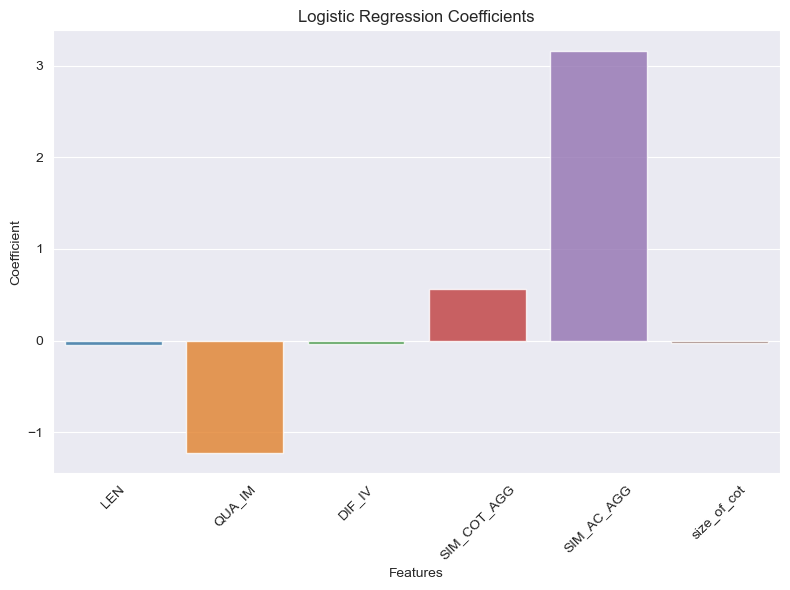

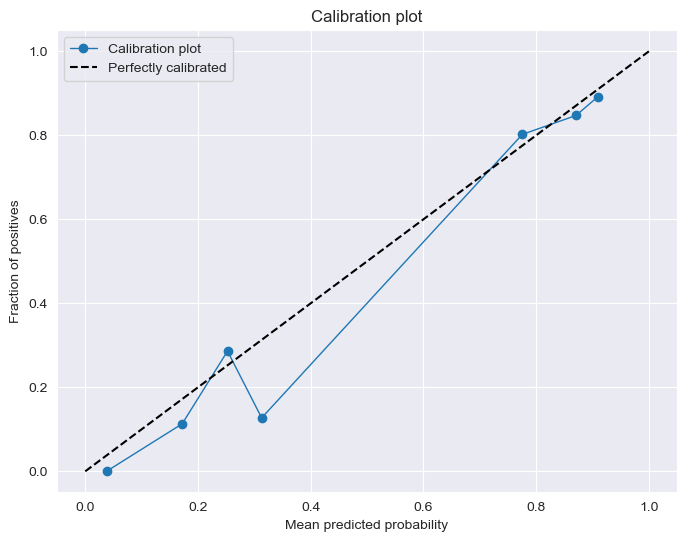

In [1480]:

# Calculate the split index
split_idx = int(len(easy_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train_easy = easy_final[feature_li].iloc[:split_idx]
y_train_easy = easy_final['Correctness'].iloc[:split_idx]
X_test_easy = easy_final[feature_li].iloc[split_idx:]
y_test_easy = easy_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train_easy = sm.add_constant(X_train_easy)
X_test_easy = sm.add_constant(X_test_easy)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train_easy, X_train_easy)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train_easy = easy_final[feature_li].iloc[:split_idx]
y_train_easy = easy_final['Correctness'].iloc[:split_idx]
X_test_easy = easy_final[feature_li].iloc[split_idx:]
y_test_easy = easy_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_easy, y_train_easy)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test_easy)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test_easy, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train_easy.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_easy, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.8078634246335479
The Brier score is: 0.142481606353664
Log Loss is: 1.3000687049578947


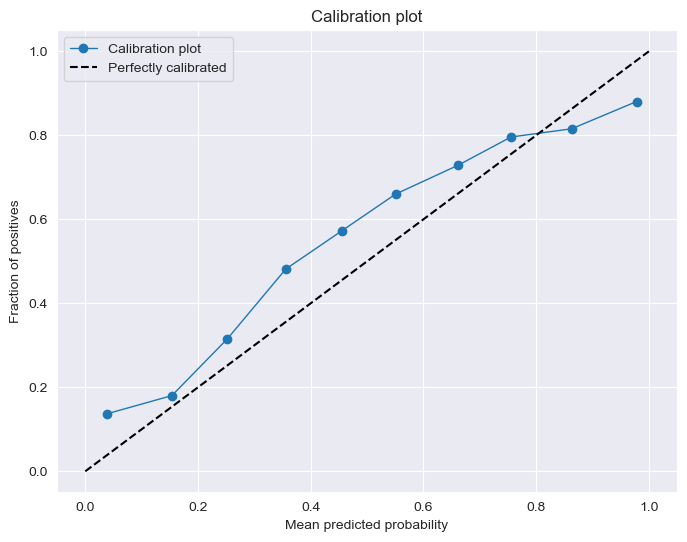

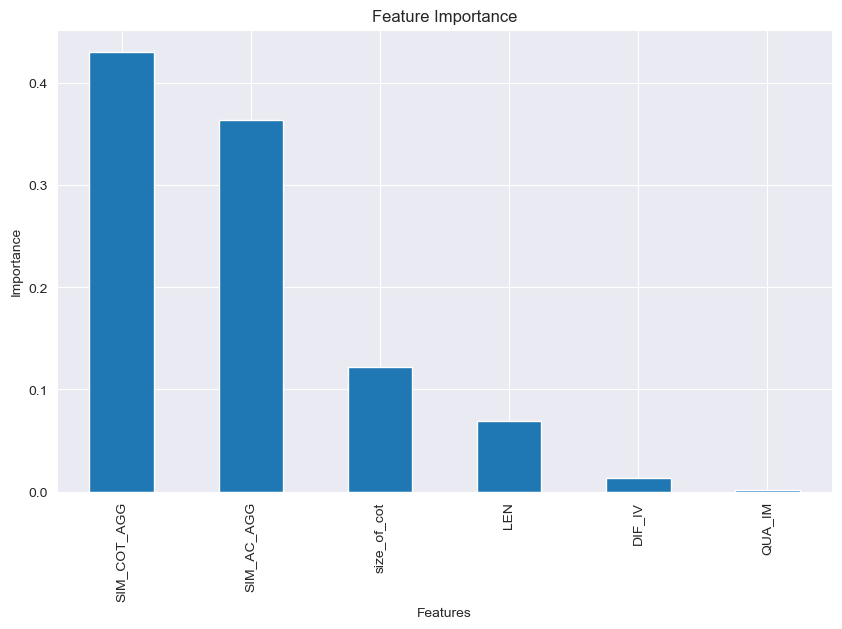

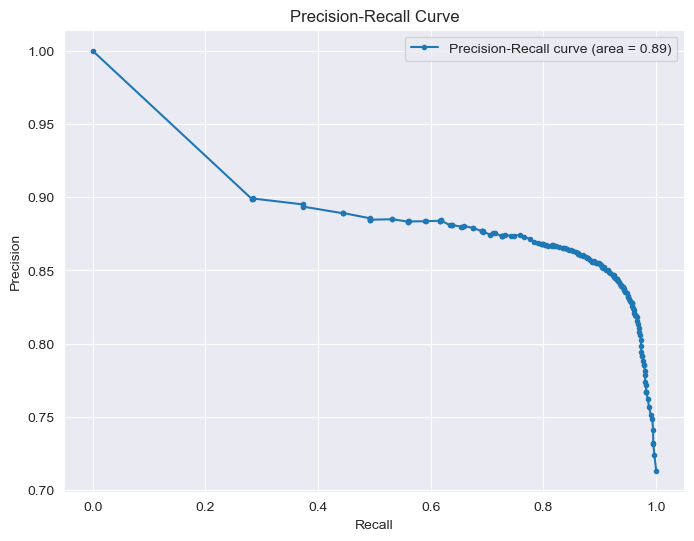

In [1481]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_easy, y_train_easy)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test_easy)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test_easy, y_pred_proba)
brier = brier_score_loss(y_test_easy, y_pred_proba)
logloss = log_loss(y_test_easy, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test_easy, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train_easy.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test_easy, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
rf_easy_model = model

W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore

AUROC Score: 0.8091997563860798
Best Threshold: 0.7391130777001875
Confusion Matrix:
[[ 719  428]
 [ 220 2633]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1147
           1       0.86      0.92      0.89      2853

    accuracy                           0.84      4000
   macro avg       0.81      0.77      0.79      4000
weighted avg       0.83      0.84      0.83      4000


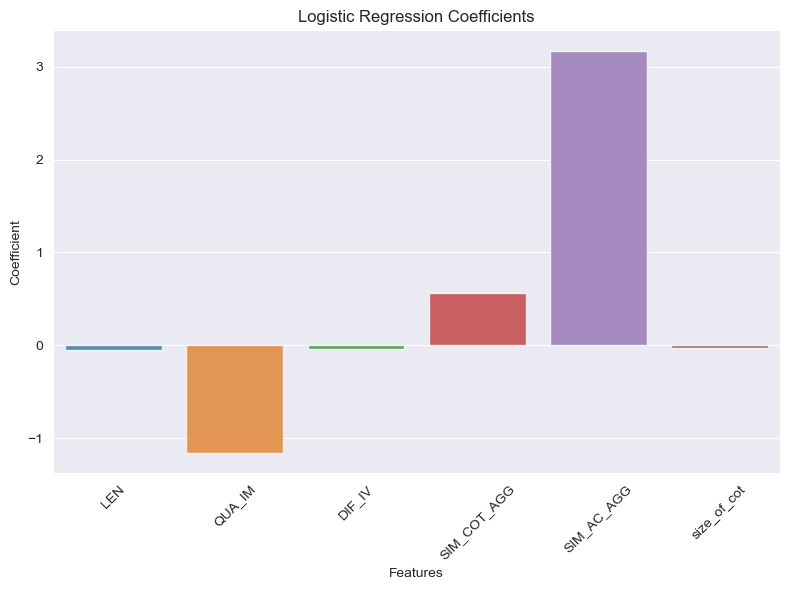

In [1482]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train_easy, y_train_easy)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test_easy)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_easy, y_probs)
auc_score = roc_auc_score(y_test_easy, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test_easy, y_probs > thresh) for thresh in thresholds]
lr_easy_best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {lr_easy_best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= lr_easy_best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test_easy, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_easy, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=X_train_easy.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
lr_easy_model = model

# CS based performance

In [502]:
def log_reg(features):
    coe = [-0.1, -5 , -1  , 3 , 2]
    lincomb = sum([coe[i]*features[i] for i in range(len(coe))]) -1.5
    return 1 / (1 + np.exp(-lincomb))
log_reg([5,0,0,1,1])

0.9525741268224334

In [518]:
cls_model.coef_

array([[ 0.03850645, -2.68974986, -0.1970077 ,  0.36097024,  2.68125891]])

In [512]:
df = hard
df_concate = hard_final
cls_model = lr_hard_model
threshold = lr_hard_best_thresh
warm_up_steps = 1

In [513]:
# df_concate['confidence_score']= cls_model.predict_proba(df_concate[feature_li])[:,1]
df_concate['confidence_score']=df_concate[feature_li].apply(log_reg,axis =1)
lists = [df_concate['confidence_score'].iloc[i:i+40].tolist() for i in range(0, len(df_concate), 40)]
df['confidence_score'] = lists

In [514]:
def normalize_cs(cs_li, threshold):
    cs_arr = np.array(cs_li)
    normalized_cs = [(cs-threshold)/(1-threshold) if cs > threshold else (cs-threshold)/(threshold) for cs in cs_arr]
    # normalized_cs = [0.5 if cs > threshold else -0.5 for cs in cs_arr]
    return np.array(normalized_cs)

In [ ]:
def stop_con1(individual_cs):
    cumulative_difference = (individual_cs[warm_up_steps:]).cumsum()
    stop_idx = np.argmax(cumulative_difference > 1)
    return stop_idx

In [515]:
CS_Answer = []
CS_correctness = []
CS_steps = []
for row_idx in range(len(df)): 
    test_row = df.iloc[row_idx]
    individual_cs = normalize_cs(test_row['confidence_score'],threshold)
    # individual_cs = test_row['confidence_score'][warm_up_steps:] - threshold
    stop_idx = stop_con1(individual_cs)
    
    if stop_idx:
        num_of_steps = warm_up_steps+stop_idx
    else: num_of_steps = 40
    answers = test_row['CoT answers'][:num_of_steps]
    scores = individual_cs[:num_of_steps]
    print(scores)
    weighted_votes = Counter()
    for answer, score in zip(answers, scores):
        if scores >= 0:
            weighted_votes[answer] += score
    # Find the answer with the highest total score
    print(weighted_votes)
    result = max(weighted_votes, key=weighted_votes.get)
    CS_Answer.append(result)
    CS_correctness.append(1 if result == str(test_row['correct answer']) else 0)
    CS_steps.append(num_of_steps)
df['CS_Answer'] = CS_Answer
df['CS_correctness'] = CS_correctness
df['CS_steps'] = CS_steps
df

[-0.37376805  0.03083009  0.1015721   0.04391545  0.11737343  0.04126239
  0.17868792 -0.14171972 -0.01139891 -0.54262732 -0.0638823  -0.0693046
 -0.12106251 -0.1365867  -0.04704622 -0.07144446 -0.07144446  0.01093581
 -0.1394248  -0.01307523 -0.14400966 -0.03726408 -0.18945051 -0.02562067
 -0.12251629 -0.15095654 -0.10618238 -0.05620208 -0.15691969 -0.01170212
 -0.15723001 -0.15691969 -0.29966555 -0.20094945 -0.18915685 -0.25174582
 -0.14069764 -0.15723001 -0.20545845 -0.50646685]
Counter({'b': 0.1896237307097063, 'd': -0.048662993522983325, '111': -0.068435289707215, '301': -0.31167313824409437, '54': -0.3737680475651508, '93': -0.5064668534537485, '11': -0.542627316148592, '112': -0.5989084203837202, 'c': -1.0770686711563482, 'a': -1.2065654234219638})
[0.05025726 0.25711551]
Counter({'a': 0.30737277866058843})
[ 0.08871914 -0.2567341   0.60454357  0.58367449]
Counter({'a': 1.0202031064981423})
[-0.99987718 -0.9542593  -0.99978001  0.25739812 -0.99745218 -0.99780049
  0.17360415  0.

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,...,SIM_AC_AGG,SIM_AC_PW,size_of_cot,SC_correctness,ES_correctness,ES_steps,confidence_score,CS_Answer,CS_correctness,CS_steps
0,0,c,"[54, c, 111, c, 111, a, b, a, d, 11, c, 112, 1...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[12, 6, 4, 5, 6, 3, 0, 4, 6, 12, 6, 4, 6, 3, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5518672199170125, 0.6051282051282052, ...","[0.5, 0.5495867768595042, 0.5443548387096775, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12...",1,1,40,"[0.23147521650098232, 0.38906606399640964, 0.4...",b,0,40
1,1,c,"[a, a, a, a, a, c, a, a, a, a, a, a, a, a, a, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 5, 5, 5, 3, 5, 5, 6, 3, 4, 3, 8, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5, 0, 0, 0, 5, 2, 0, 2, 0, 5, 9, 0, ...",Challenging Math,"[0.0, 0.6423357664233577, 0.5263157894736843, ...","[0.5, 0.6423357664233577, 0.5428571428571429, ...",...,"[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12...",0,0,5,"[0.401312339887548, 0.5317092115506606, 0.8615...",a,0,2
2,2,a,"[a, a, a, a, a, error, error, a, a, a, error, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 2, 2, 2, 10, 10, 2, 2, 0, 10, 0, 0, 9, ...",Challenging Math,"[0.0, 0.943089430894309, 0.943089430894309, 0....","[0.5, 0.943089430894309, 0.967479674796748, 0....",...,"[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12...",1,1,5,"[0.425557483188341, 0.2747346814474502, 0.7507...",a,1,4
3,3,a,"[error, a, a, a, a, a, a, a, a, a, 100%, 100%,...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 6, 5, 6, 5, 4, 3, 4, 4, 4, 7, 6, 3, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 2, 9, 2, 9, 9, 2, 0, 9, 2, 2, 0, 0, 5, 0,...",Challenging Math,"[0.0, 0.012422360248447228, 0.5151515151515151...","[0.5, 0.012345679012345734, 0.5276381909547738...",...,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12...",1,1,6,"[4.5397868702434395e-05, 0.01690721647021199, ...",100%,0,40
4,4,b,"[b, 36, b, b, b, b, e, b, b, b, e, b, b, b, b,...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 6, 3, 3, 3, 3, 4, 3, 3, 3, 5, 5, 3, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5091575091575091, 0.49416342412451364,...","[0.5, 0.5072992700729927, 0.5226480836236933, ...",...,"[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12...",1,1,21,"[0.425557483188341, 0.3593693965810613, 0.4422...",b,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,b,"[b, b, b, b, b, b, b, b, 17, b, 17, 17, b, b, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[4, 6, 5, 6, 9, 5, 6, 4, 8, 4, 8, 8, 8, 8, 8, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.6560509554140128, 0.7225806451612904, ...","[0.0033464254621424277, 0.011799870229907203, ...",...,"[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1,5,"[0.1312489477717759, 0.11258538574093056, 0.52...",b,1,6
496,496,e,"[e, e, e, e, 

In [516]:
print(df.ES_steps.mean(),df.CS_steps.mean())
print()
print(df.ES_correctness.value_counts(),df.CS_correctness.value_counts())
print()
print(df.ES_correctness.sum()/len(df),df.CS_correctness.sum()/len(df))

19.301 14.471

ES_correctness
1    573
0    427
Name: count, dtype: int64 CS_correctness
0    515
1    485
Name: count, dtype: int64

0.573 0.485


In [519]:

df_t07 = pd.read_json('../data/T0.7.jsonl', lines=True)

In [522]:
df_t07['generated_answer'].iloc[0][3]

"A: Janet's ducks lay 16 eggs per day. She eats 3 and uses 4 for muffins every day. So she has 16 - 3 - 4 = 9 eggs left to sell. She can sell the 9 eggs for 9 x 2 = $18 per day. The answer is $18."

In [1414]:
import re
ANS_RE = re.compile(r"#### (\-?[0-9\.\,]+)")
INVALID_ANS = "[invalid]"


def extract_answer(completion):
    match = ANS_RE.search(completion)
    if match:
        match_str = match.group(1).strip()
        match_str = match_str.replace(",", "")
        return match_str
    else:
        return INVALID_ANS
extract_answer(df_t07.iloc[0]['answer'])

'18'

In [1343]:
tem_1 = df_t07['generated_answer'].iloc[0][3]
number_list = re.findall(r"\d+\.?\d*", tem_1)
try:
    predict1 = number_list[-1].strip('.')
except:
    predict1 = -1000
predict1

'18'

In [937]:
number_list

['16', '3', '4', '16', '3', '4', '9', '9', '9', '2', '18', '18.']